In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
data = pd.read_csv("data_P6.csv")
data = pd.DataFrame(data)

In [3]:
customers = pd.read_csv("customers.csv")
customers = pd.DataFrame(customers)

products = pd.read_csv("products.csv")
products = pd.DataFrame(products)

transactions = pd.read_csv("transactions.csv")
transactions = pd.DataFrame(transactions)

# Demandes d'Antoine

## Etude du CA

### Répartition du CA dans le temps

Calcul du CA total

In [4]:
data['date'] = pd.to_datetime(data['date'],yearfirst=True)

data_date = data.groupby(['date']).sum().reset_index()
data_peryear = data.groupby(pd.Grouper(key="date", freq="1Y")).sum().reset_index()
data_perquarter = data.groupby(pd.Grouper(key="date", freq="Q")).sum().reset_index()
data_permonth = data.groupby(pd.Grouper(key="date", freq="1M")).sum().reset_index()

prix = "Le CA total est de {:,} €"
print(prix.format(data['price'].sum()))

Le CA total est de 11,853,728.68 €


Représentation du CA dans le temps

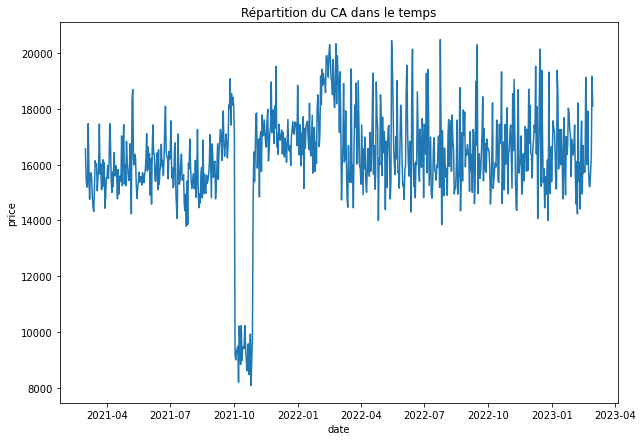

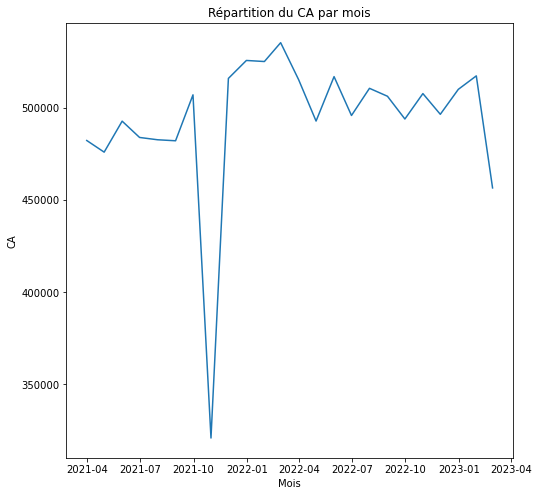

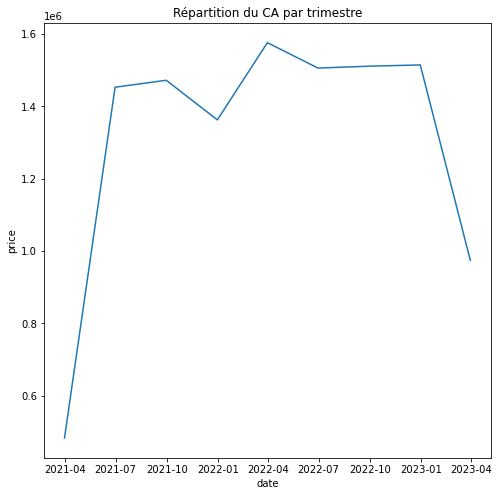

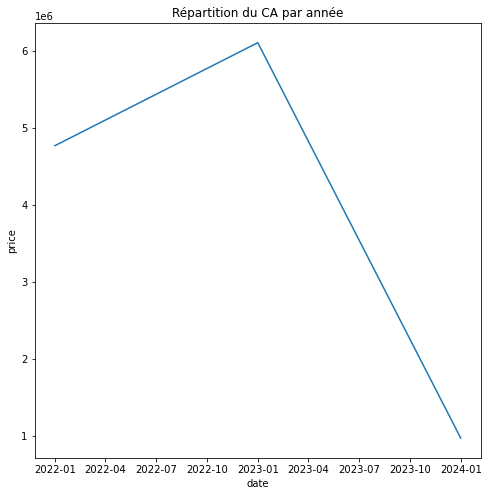

In [5]:
plt.figure(figsize=(10,7))
sns.lineplot(x=data_date['date'], y=data_date['price'])
plt.title('Répartition du CA dans le temps')
plt.show()

plt.figure(figsize=(8, 8))
sns.lineplot(x=data_permonth['date'], y=data_permonth['price'])
plt.title("Répartition du CA par mois")
plt.xlabel('Mois')
plt.ylabel('CA')
plt.savefig("P6_Repartition_CA_total.png", dpi=150)
plt.show()

plt.figure(figsize=(8, 8))
sns.lineplot(x=data_perquarter['date'], y=data_perquarter['price'])
plt.title('Répartition du CA par trimestre')
plt.show()

plt.figure(figsize=(8, 8))
sns.lineplot(x=data_peryear['date'], y=data_peryear['price'])
plt.title('Répartition du CA par année')
plt.show()

Représentation par la moyenne mobile

In [6]:
data_date['Rolling_CA'] = data_date['price'].rolling(2).mean()
data_peryear['Rolling_CA'] = data_peryear['price'].rolling(2).mean()
data_perquarter['Rolling_CA'] = data_perquarter['price'].rolling(2).mean()
data_permonth['Rolling_CA'] = data_permonth['price'].rolling(2).mean()

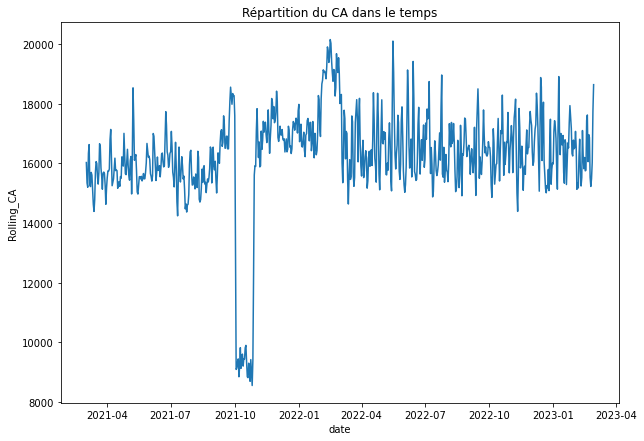

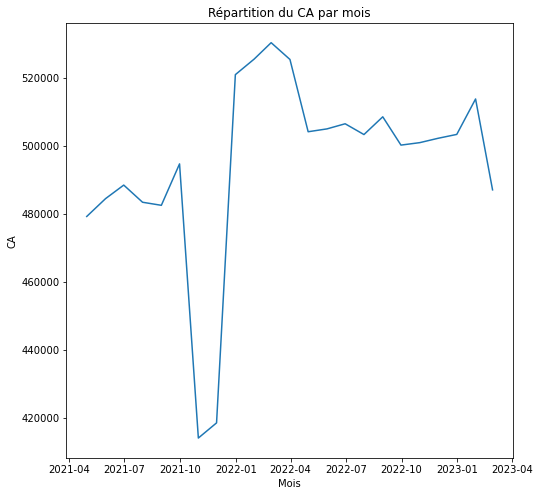

In [7]:
plt.figure(figsize=(10,7))
sns.lineplot(x=data_date['date'], y=data_date['Rolling_CA'])
plt.title('Répartition du CA dans le temps')
plt.show()

plt.figure(figsize=(8, 8))
sns.lineplot(x=data_permonth['date'], y=data_permonth['Rolling_CA'])
plt.title("Répartition du CA par mois")
plt.xlabel('Mois')
plt.ylabel('CA')
plt.savefig("P6_Repartition_CA.png", dpi=150)
plt.show()

### Zoom sur la baisse de CA 10/2021

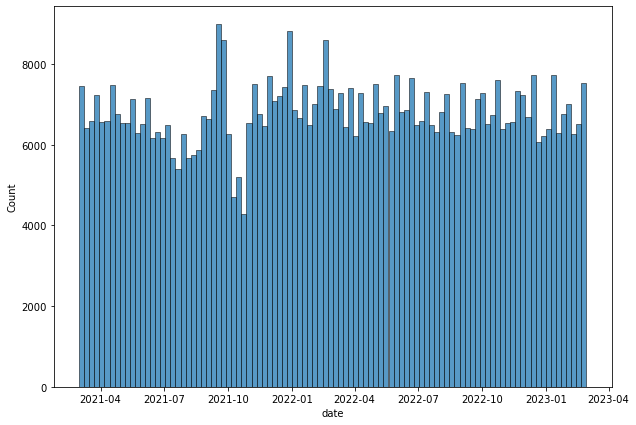

In [8]:
plt.figure(figsize=(10,7))
sns.histplot(x=data['date'], bins=100)
plt.show()

Evolution du CA par jour et pour chaque catégorie

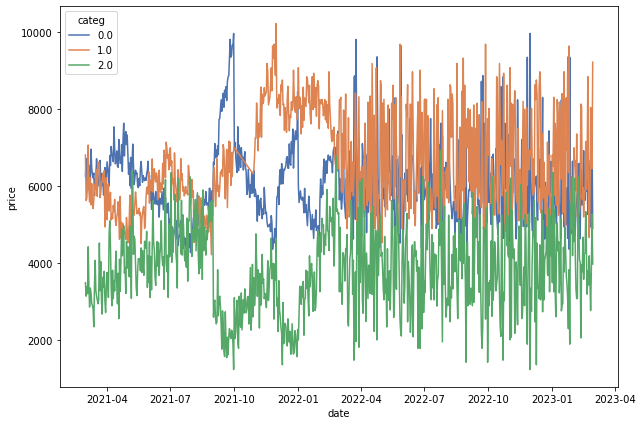

In [9]:
data_datecateg = data.groupby(['date', 'categ']).sum().reset_index()

plt.figure(figsize=(10,7))
sns.lineplot(x=data_datecateg['date'], y=data_datecateg['price'], hue=data_datecateg['categ'], palette='deep')
plt.show()

Evolution du CA par mois et pour chaque catégorie

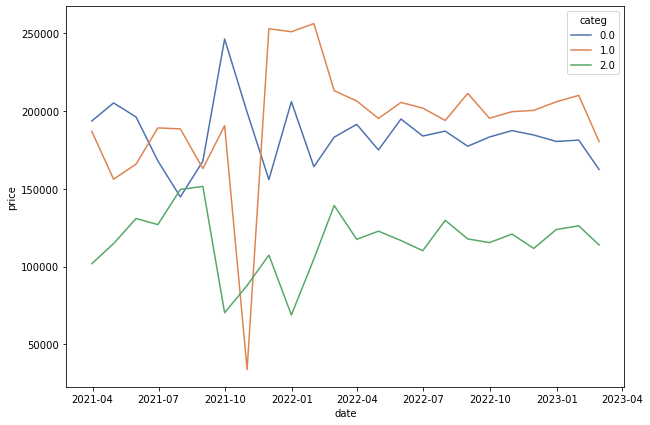

In [10]:
date_repart_categ = data.groupby([pd.Grouper(key="date", freq="1M"), 'categ']).sum().reset_index()

plt.figure(figsize=(10,7))
sns.lineplot(x=date_repart_categ['date'], y=date_repart_categ['price'], hue=date_repart_categ['categ'], palette='deep')
plt.show()

Représentation de l'évolution du CA par catégories

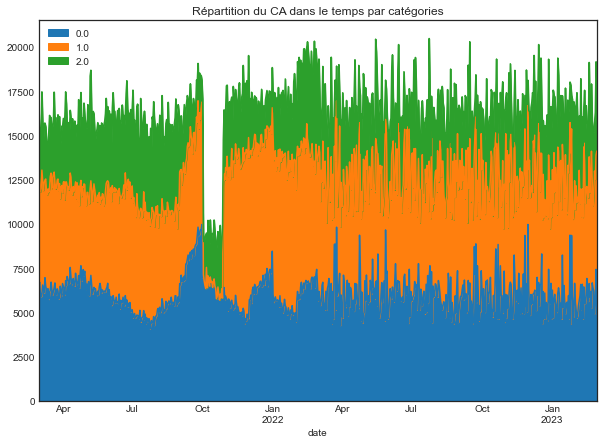

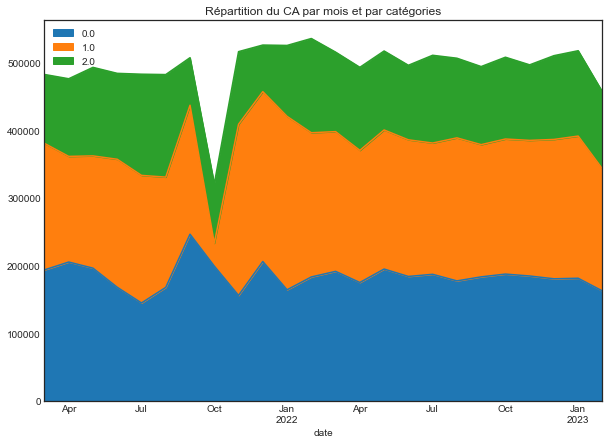

In [11]:
data_datecateg_area = data_datecateg.drop(columns=['birth'])
data_datecateg_area = data_datecateg_area.pivot(index='date', columns='categ', values='price')

plt.style.use('seaborn-white')
data_datecateg_area.plot.area(figsize=(10,7))
plt.title('Répartition du CA dans le temps par catégories')
plt.legend(loc='upper left')
plt.savefig('P6_Répartition_CA_categ', dpi=150)
plt.show()

data_repart_area = date_repart_categ.drop(columns=['birth'])
data_repart_area = data_repart_area.pivot(index='date', columns='categ', values='price')

plt.style.use('seaborn-white')
data_repart_area.plot.area(figsize=(10,7))
plt.title('Répartition du CA par mois et par catégories')
plt.legend(loc='upper left')
plt.savefig('P6_Répartition_CA_categ2', dpi=150)
plt.show()

Localisation des transactions produits categ 1 pour le mois d'Octobre 2021

In [12]:
data_categmiss = data.loc[(data['date'] >= '2021-10') & (data['date'] < '2021-11')].sort_values(['date'])
data_categmiss_1 = data_categmiss.loc[data_categmiss['categ'] == 1.0]

print("unique: \n",data_categmiss_1.nunique(axis=0))
print("count: \n",data_categmiss_1.count())
data_categmiss_1

unique: 
 id_prod        376
date             5
session_id    1294
client_id     1106
timestamp     1666
sex              2
birth           74
price          225
categ            1
dtype: int64
count: 
 id_prod       1666
date          1666
session_id    1666
client_id     1666
timestamp     1666
sex           1666
birth         1666
price         1666
categ         1666
dtype: int64


,id_prod,date,session_id,client_id,timestamp,sex,birth,price,categ
396017,1_616,2021-10-01,s_98562,c_230,20:27:55.147681,m,1997,29.02,1.0
394964,1_464,2021-10-01,s_98531,c_5121,18:09:35.283009,m,1990,15.01,1.0
96656,1_456,2021-10-01,s_98187,c_3645,00:45:27.258779,f,1986,28.27,1.0
392743,1_253,2021-10-01,s_98199,c_848,01:34:28.726594,m,1971,14.99,1.0
396409,1_469,2021-10-01,s_98332,c_5765,08:34:35.747969,m,1952,5.99,1.0
...,...,...,...,...,...,...,...,...,...
85364,1_305,2021-10-31,s_112767,c_2243,14:45:17.877445,m,1958,29.99,1.0
165929,1_260,2021-10-31,s_112856,c_3577,18:52:30.836956,m,1979,17.63,1.0
254585,1_432,2021-10-31,s_112834,c_1271,18:00:54.446270,m,1997,24.20,1.0
49954,1_433,2021-10-31,s_112681,c_2015,10:07:00.778036,m,1960,18.99,1.0


Comparaison avec la quantité de produits vendus par mois pour chaque catégorie

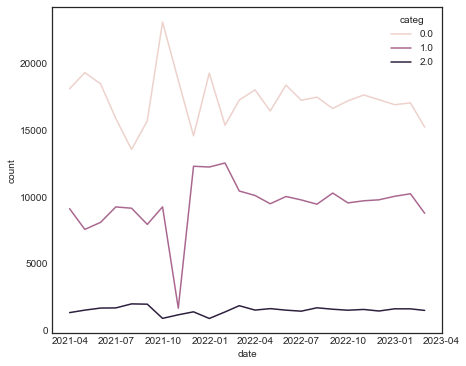

In [55]:
data_count = data.groupby(['date'])['categ'].value_counts()
data_count = pd.DataFrame(data_count)
data_count = data_count.rename(columns={'categ':'count'}).reset_index()
data_count = data_count.groupby([pd.Grouper(key="date", freq="1M"), 'categ']).sum().reset_index()

plt.figure(figsize=(7,6))
sns.lineplot(data=data_count, x='date',y='count', hue='categ')
plt.show()

# Analyse des produits 

### Zoom sur les produits les plus/moins vendus

In [14]:
sales_count = data.value_counts(subset='id_prod')
sales_count = pd.DataFrame(sales_count).reset_index()
sales_count = sales_count.rename(columns={0: 'total_sales'})
sales_count = sales_count.merge(products,on='id_prod')

all_sales = sales_count['total_sales'].sum()
sales_count['perc_sales'] = sales_count['total_sales']/all_sales

most_sales = sales_count.sort_values(by=['total_sales'],ascending=False).head(10)
less_sales = sales_count.sort_values(by=['total_sales']).head(10)

display(most_sales)
display(less_sales)

,id_prod,total_sales,price,categ,perc_sales
0,1_369,2252,23.99,1,0.003316
1,1_417,2189,20.99,1,0.003223
2,1_414,2180,23.83,1,0.003210
3,1_498,2128,23.37,1,0.003134
4,1_425,2096,16.99,1,0.003086
5,1_403,1960,17.99,1,0.002886
6,1_412,1951,16.65,1,0.002873
7,1_413,1945,17.99,1,0.002864
8,1_406,1939,24.81,1,0.002855
9,1_407,1935,15.99,1,0.002849


,id_prod,total_sales,price,categ,perc_sales
3264,0_2201,1,20.99,0,0.000001
3247,0_1498,1,2.48,0,0.000001
3248,0_1728,1,2.27,0,0.000001
3249,0_1539,1,0.99,0,0.000001
3250,2_98,1,149.74,2,0.000001
3251,0_1284,1,1.38,0,0.000001
3252,0_1379,1,2.99,0,0.000001
3253,2_23,1,115.99,2,0.000001
3254,0_541,1,1.99,0,0.000001
3263,0_1601,1,1.99,0,0.000001


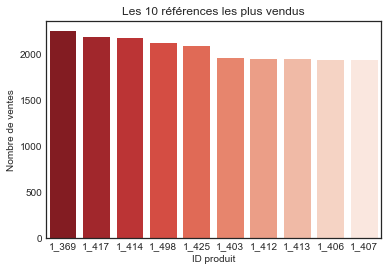

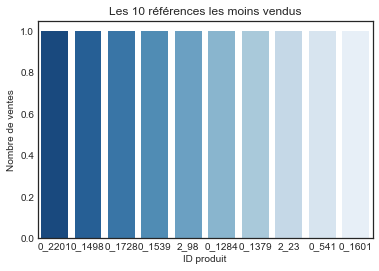

In [15]:
sns.barplot(data=most_sales, x='id_prod', y='total_sales', palette='Reds_r')
plt.title("Les 10 références les plus vendus")
plt.xlabel("ID produit")
plt.ylabel("Nombre de ventes")
plt.savefig("P6_Ref_Tops", dpi=150)
plt.show()

sns.barplot(data=less_sales, x='id_prod', y='total_sales', palette='Blues_r')
plt.title("Les 10 références les moins vendus")
plt.xlabel("ID produit")
plt.ylabel("Nombre de ventes")
plt.savefig("P6_Ref_Flops", dpi=150)
plt.show()

## Répartition des ventes par catégorie

categ
0.0      415459
1.0      227169
2.0       36483
dtype: int64

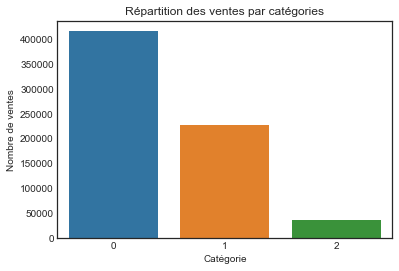

In [16]:
display(data.value_counts(['categ']))
sns.barplot(data=data.value_counts(['categ']))
plt.title("Répartition des ventes par catégories")
plt.xlabel("Catégorie")
plt.ylabel("Nombre de ventes")
plt.savefig("P6_Rep_ventes_categ", dpi=150)
plt.show()

# Etude sur les clients

## En CA par client

Courbe de Lorenz et indice de Gini à partir du CA par client

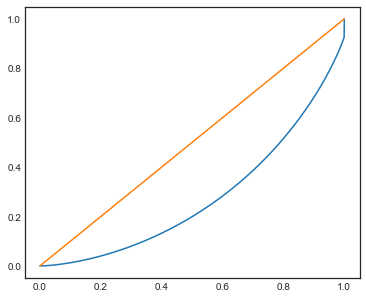

L'indice de gini est de : 0.44638654137401135


In [17]:
data_client = data.groupby(by=['client_id']).sum()
data_client = data_client.drop(columns=['birth', 'categ'])

arr = np.array(data_client['price'].values)
arr = np.sort(arr)

def gini(arr):
    count = arr.size
    coefficient = 2 / count
    indexes = np.arange(1, count + 1)
    weighted_sum = (indexes * arr).sum()
    total = arr.sum()
    constant = (count + 1) / count
    return coefficient * weighted_sum / total - constant

def lorenz(arr):
    scaled_prefix_sum = arr.cumsum() / arr.sum()
    return np.insert(scaled_prefix_sum, 0, 0)

lorenz_curve = lorenz(arr)
plt.figure(figsize=(6,5))
plt.plot(np.linspace(0.0, 1.0, lorenz_curve.size), lorenz_curve)
plt.plot([0,1], [0,1])
plt.show()

print("L'indice de gini est de :", gini(arr))

### Zoom sur les plus gros acheteurs (en CA)

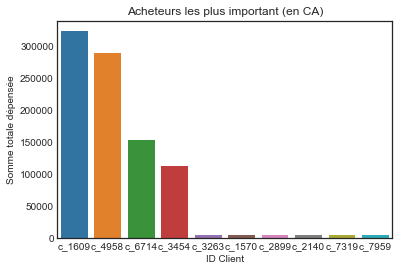

In [18]:
colors = {'c_1609':'tab:blue','c_4958':'tab:orange','c_6714':'tab:green','c_3454':'tab:red','c_3263':'tab:purple',
          'c_1570':'tab:brown','c_2899':'tab:pink','c_2140':'tab:gray','c_7319':'tab:olive','c_7959':'tab:cyan'}

data_client = data_client.sort_values(by=['price'], ascending=False).reset_index()

sns.barplot(data=data_client.head(10),x='client_id', y='price', palette=colors)
plt.title("Acheteurs les plus important (en CA)")
plt.xlabel("ID Client")
plt.ylabel("Somme totale dépensée")
plt.savefig("P6_Top_clients_CA", dpi=150)
plt.show()

## En nombre de ventes par client

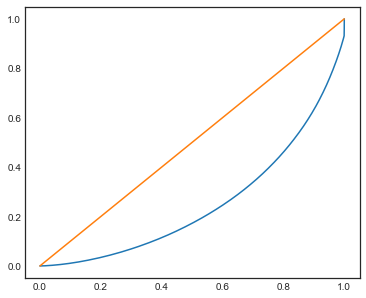

L'indice de gini est de : 0.49813749476786895


In [19]:
clients_count = data.value_counts(subset='client_id').reset_index()
clients_count = pd.DataFrame(clients_count)
clients_count = clients_count.rename(columns={0: 'total_sales'})

arr = np.array(clients_count['total_sales'].values)
arr = np.sort(arr)

lorenz_curve = lorenz(arr)
plt.figure(figsize=(6,5))
plt.plot(np.linspace(0.0, 1.0, lorenz_curve.size), lorenz_curve)
plt.plot([0,1], [0,1])
plt.show()

print("L'indice de gini est de :", gini(arr))

### Zoom sur les plus gros acheteurs (en nbr de ventes)

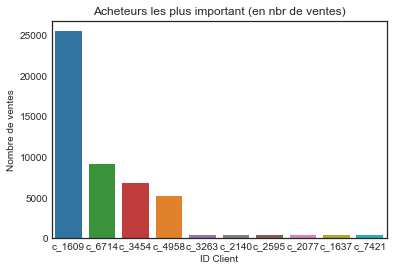

,client_id,total_sales
0,c_1609,25488
1,c_6714,9181
2,c_3454,6770
3,c_4958,5195
4,c_3263,403
5,c_2140,402
6,c_2595,398
7,c_2077,384
8,c_1637,380
9,c_7421,379


In [20]:
colors = {'c_1609':'tab:blue','c_4958':'tab:orange','c_6714':'tab:green','c_3454':'tab:red','c_3263':'tab:purple',
          'c_2595':'tab:brown','c_2077':'tab:pink','c_2140':'tab:gray','c_1637':'tab:olive','c_7421':'tab:cyan'}

sns.barplot(data=clients_count.head(10),x='client_id', y='total_sales', palette=colors)
plt.title("Acheteurs les plus important (en nbr de ventes)")
plt.xlabel("ID Client")
plt.ylabel("Nombre de ventes")
plt.savefig("P6_Top_clients_nbr", dpi=150)
plt.show()

display(clients_count.head(10))